<a href="https://colab.research.google.com/github/Lidiia-Afanasieva/ISSvsSteven_kNN/blob/main/kNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
from sklearn.datasets import fetch_openml, load_digits
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib
import math

In [37]:
def Euclidean_distance(row1, row2):
    distance = 0
    for i in range(len(row1)-1):
        distance += (row1[i] - row2[i])**2
    return math.sqrt(distance)

In [38]:
def Get_Neighbors(train, test_row, k):
 
    distance = []
    data = []
    for i in train:
        dist = Euclidean_distance(test_row, i)
        distance.append(dist)
        data.append(i)
    distance = np.array(distance)
    data = np.array(data)
    #Finding the index in ascending order
    index_dist = distance.argsort()
    #Arranging data according to index
    data = data[index_dist]
    #slicing k value from number of data
    neighbors = data[:k]

    return neighbors

In [39]:
def predict_classification(train, test_row, k):
    Neighbors = Get_Neighbors(train, test_row, k)
    Classes = []
    for i in Neighbors:
        Classes.append(i[-1])
    prediction = max(Classes, key= Classes.count)
    return prediction

In [40]:
def accuracy(y_true, y_pred):
    n_correct = 0
    for i in range(len(y_true)):
        if y_true[i] == y_pred[i]:
            n_correct += 1
    acc = n_correct/len(y_true)
    return acc

In [30]:
mnist = fetch_openml('mnist_784') #load_digits()

In [41]:
# checking the column names and preprocessing target values in standard format
mnist.keys()
mnist.target = mnist.target.astype(np.int8)
#Determining independent and dependent variable and finding the shape
x = np.array(mnist.data)
y = np.array(mnist.target)
x.shape, y.shape
#output ((70000, 784), (70000,))
# shuffling the values of x and y
si = np.random.permutation(x.shape[0])
x = x[si][:20000]
y = y[si][:20000]

In [35]:
print(len(x))

70000


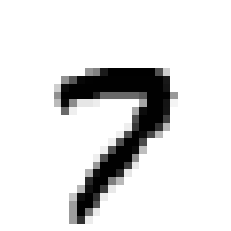

In [42]:
some_digit = x[12]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary)
plt.axis('off')
plt.show()

In [43]:
#slicing data
trainx = x[:2000]
trainy = y[:2000]
#Inserting trainy in trainx
train = np.insert(trainx, 784, trainy, axis = 1)
prediction = predict_classification(train, train[1244], 4)
prediction
#Output 8.0

3.0

In [44]:
train[1244][-1]
#output 8.0

3.0

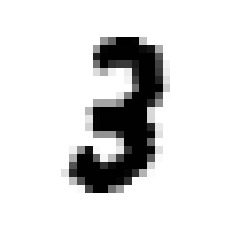

In [45]:
#Plotting the output
some_digit = train[1244][:-1]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary)
plt.axis('off')
plt.show()

In [46]:
y_pred=[]
y_true=train[:,-1]
for i in range(len(train)):
    prediction = predict_classification(train, train[i], 4)
    y_pred.append(prediction)


In [47]:
print(len(y_true))
print(len(y_pred))

2000
2000


In [48]:
# Accuracy
accuracy(y_true, y_pred)
# Output 0.929 (i.e., 92%)

0.9715